# Preprocessing

# Data randomization

In [2]:
import random

fid = open("feature_files/training_set/training_set.csv", "r")
li = fid.readlines()
fid.close()
# print(li)

random.shuffle(li)
# print(li)

fid = open("output.csv", "w")
fid.writelines(li)
fid.close()

# Loading Randomized Data

In [1]:
from csv import reader
import pandas as pd
import numpy as np

train = pd.read_csv('feature_files/training_set/shuffled.csv', header=None)
row, col = train.shape
y = np.ndarray(shape=(row, ),dtype=float)
x = np.ndarray(shape=(row, 42), dtype=float)
for i in range(row):
    for j in range(col):
        if(j < col - 1):
            x[i][j] = train[j][i]
        else:
            y[i] = train[j][i]
print(x.shape)
print(y.shape)
print(x)
print(y)
            








(8476, 42)
(8476,)
[[4.74128193e+00 4.76438684e+00 4.74128193e+00 ... 6.96000000e-06
  8.25000000e-06 2.28000000e-06]
 [4.69071172e+00 4.68351967e+00 4.76438684e+00 ... 8.13000000e-05
  7.16000000e-05 7.41000000e-05]
 [4.70226417e+00 4.68351967e+00 4.68351967e+00 ... 9.15000000e-06
  7.54000000e-06 3.50000000e-06]
 ...
 [4.74128193e+00 4.72972948e+00 4.74128193e+00 ... 3.96465700e-03
  8.75000000e-05 6.25979000e-04]
 [4.74128193e+00 4.72972948e+00 4.71817703e+00 ... 2.27036700e-03
  1.93170000e-04 9.79523000e-04]
 [4.71817703e+00 4.71817703e+00 4.72972948e+00 ... 4.29514000e-03
  1.17213000e-04 8.45242000e-04]]
[1. 1. 1. ... 0. 0. 0.]


# SVM Classifier

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [49]:


X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.75, random_state=42)
svm = SVC(kernel='rbf', random_state = 1)
svm.fit(X_train,y_train)
Y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test,Y_pred)








# Accuracy and Prediction


Accuracy Of SVM For The Given Dataset :  99.7168475696083


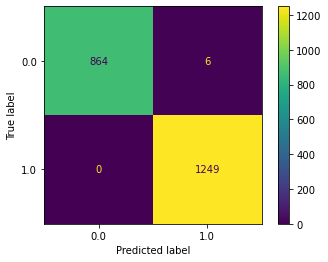

In [50]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm, X_test, y_test)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy * 100)

In [51]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       870
         1.0       1.00      1.00      1.00      1249

    accuracy                           1.00      2119
   macro avg       1.00      1.00      1.00      2119
weighted avg       1.00      1.00      1.00      2119



In [52]:
for i in range(len(Y_pred)):
    res = ""
    if (y_test[i] == 0):
        res += "Actual result: NORMAL"
    else:
        res += "Actual result: AUTISM"
    
    
    if (Y_pred[i] == 0):
        res += ", Predicted result: NORMAL"
    else:
        res += ", Predicted result: AUTISM"
    print(res)

Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result:

Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result:

# Decision Tree classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.75, random_state=42)
dectree = DecisionTreeClassifier(random_state=2)
dectree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2)

In [61]:
Y_pred = dectree.predict(X_test)

cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum()) / len(y_test)
print("\nAccuracy Of Decision Tree For The Given Dataset : ", accuracy * 100)



Accuracy Of Decision Tree For The Given Dataset :  99.95280792826804


# Accuracy and Prediction

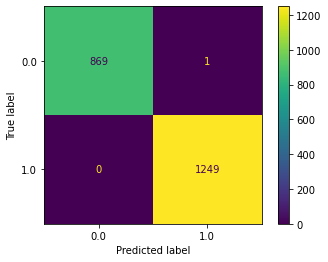

In [62]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dectree, X_test, y_test) 


In [22]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       701
         1.0       1.00      1.00      1.00       995

    accuracy                           1.00      1696
   macro avg       1.00      1.00      1.00      1696
weighted avg       1.00      1.00      1.00      1696



In [23]:
for i in range(len(Y_pred)):
    res = ""
    if (y_test[i] == 0):
        res += "Actual result: NORMAL"
    else:
        res += "Actual result: AUTISM"
    
    
    if (Y_pred[i] == 0):
        res += ", Predicted result: NORMAL"
    else:
        res += ", Predicted result: AUTISM"
    print(res)

Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result:

# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.75, random_state=42)
ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
ranfor.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=1)

In [67]:
Y_pred = ranfor.predict(X_test)
cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum()) / len(y_test)
print("\nAccuracy Of Random Forest For The Given Dataset : ", accuracy * 100)



Accuracy Of Random Forest For The Given Dataset :  99.95280792826804


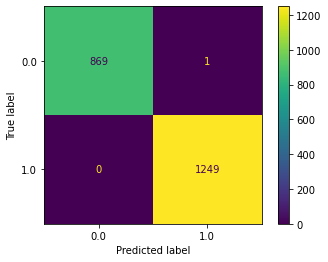

In [68]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(ranfor, X_test, y_test) 

In [29]:
print(classification_report(y_test,Y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       701
         1.0       1.00      1.00      1.00       995

    accuracy                           1.00      1696
   macro avg       1.00      1.00      1.00      1696
weighted avg       1.00      1.00      1.00      1696



In [30]:
from sklearn import metrics

In [31]:
for i in range(len(Y_pred)):
    res = ""
    if (y_test[i] == 0):
        res += "Actual result: NORMAL"
    else:
        res += "Actual result: AUTISM"
    
    
    if (Y_pred[i] == 0):
        res += ", Predicted result: NORMAL"
    else:
        res += ", Predicted result: AUTISM"
    print(res)

Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result:

Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result:

# Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
print (x)
print(y)

[[4.74128193e+00 4.76438684e+00 4.74128193e+00 ... 6.96000000e-06
  8.25000000e-06 2.28000000e-06]
 [4.69071172e+00 4.68351967e+00 4.76438684e+00 ... 8.13000000e-05
  7.16000000e-05 7.41000000e-05]
 [4.70226417e+00 4.68351967e+00 4.68351967e+00 ... 9.15000000e-06
  7.54000000e-06 3.50000000e-06]
 ...
 [4.74128193e+00 4.72972948e+00 4.74128193e+00 ... 3.96465700e-03
  8.75000000e-05 6.25979000e-04]
 [4.74128193e+00 4.72972948e+00 4.71817703e+00 ... 2.27036700e-03
  1.93170000e-04 9.79523000e-04]
 [4.71817703e+00 4.71817703e+00 4.72972948e+00 ... 4.29514000e-03
  1.17213000e-04 8.45242000e-04]]
[1. 1. 1. ... 0. 0. 0.]


In [76]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.75, random_state=42)
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)

In [77]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

In [78]:
for i in range(len(Y_pred)):
    res = ""
    if (y_test[i] == 0):
        res += "Actual result: NORMAL"
    else:
        res += "Actual result: AUTISM"
    
    
    if (Y_pred[i] == 0):
        res += ", Predicted result: NORMAL"
    else:
        res += ", Predicted result: AUTISM"
    print(res)

Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result:

Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result:

In [79]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 869    1]
 [   0 1249]]


In [80]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, Y_pred) * 100)

Accuracy :  99.95280792826804


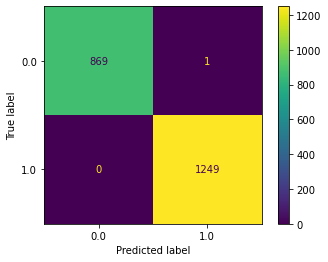

In [81]:
plot_confusion_matrix(logreg, X_test, y_test) 

In [40]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       701
         1.0       1.00      1.00      1.00       995

    accuracy                           1.00      1696
   macro avg       1.00      1.00      1.00      1696
weighted avg       1.00      1.00      1.00      1696



# KNN Classifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.75, random_state=42)
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)

In [84]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

In [85]:
for i in range(len(Y_pred)):
    res = ""
    if (y_test[i] == 0):
        res += "Actual result: NORMAL"
    else:
        res += "Actual result: AUTISM"
    
    
    if (Y_pred[i] == 0):
        res += ", Predicted result: NORMAL"
    else:
        res += ", Predicted result: AUTISM"
    print(res)

Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: AUTISM, Predicted result:

Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM
Actual result: NORMAL, Predicted result: NORMAL
Actual result: NORMAL, Predicted result: NORMAL
Actual result: AUTISM, Predicted result: AUTISM


In [86]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 868    2]
 [   3 1246]]


In [87]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, Y_pred) * 100)

Accuracy :  99.76403964134025


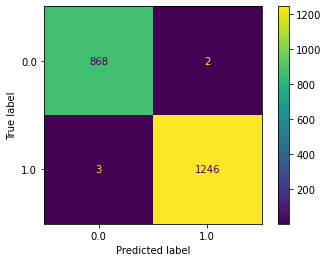

In [88]:
plot_confusion_matrix(knn, X_test, y_test) 